### draw joint distribution plots for the sp3 acid - sp3 amine system. (Fig. 4c)

In [1]:
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import pandas as pd

from rdkit.Chem import rdMolDescriptors, Descriptors
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

from matplotlib import cm
plasma = cm.get_cmap('plasma', 32)

RDKit WARNING: [13:29:30] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
def getLogP(x): return Chem.rdMolDescriptors.CalcCrippenDescriptors(x)[0]
def getMW(x): return Chem.Descriptors.MolWt(x)
def getHBD(x): return Chem.rdMolDescriptors.CalcNumHBD(x)
def getHBA(x): return Chem.rdMolDescriptors.CalcNumHBA(x)
def getPSA(x): return Chem.rdMolDescriptors.CalcTPSA(x)
def getROTB(x): return Chem.rdMolDescriptors.CalcNumRotatableBonds(x)
def getAROM(x): return Chem.rdMolDescriptors.CalcNumAromaticRings(x)
def getFSP3(x): return Chem.rdMolDescriptors.CalcFractionCSP3(x)
def getFC(x): return Chem.rdmolops.GetFormalCharge(x)
def getQED(x): return Chem.QED.qed(x)
def getSSSR(x): return Chem.GetSSSR(x)

def getallprops(s):
    x = Chem.MolFromSmiles(s)
    return [getLogP(x),getMW(x),getHBD(x),getHBA(x),getPSA(x),getROTB(x),getFSP3(x),getSSSR(x),getQED(x)]

In [9]:
prop_names = ['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']

In [10]:
# read data for entire molecule

data1 = pd.read_csv("./ac2drug_am2small/ac2drug_am2small_aromatic_props.csv")
data1["source"] = ["molecule"] * len(data1)

# this is the reaction matrix for sp2-sp2 amide coupling
data1_props = data1[prop_names].copy()
amide_row = np.array(data1[data1.rmat_tag==50230227][prop_names])

# the change of each property in relation to the amide's
data1_deltas = data1_props-amide_row

In [11]:
# replace properties with difference from amide 
# technically can be new rows, but this takes less memory
data1[prop_names] = data1_deltas

In [12]:
data1.sort_values("rmat_tag",inplace=True)
data1.reset_index(drop=True,inplace=True)

In [14]:
# read data for reaction center only

data2 = pd.read_csv("./ac2drug_am2small/ac2drug_am2small_rxn_centers_props.csv")
# data2 = pd.read_csv("../late_stage_div_copy/props_ac3drug_am3small_small.csv")
data2["source"] = ["RxnCenter"] * len(data2)
data2_props = data2[prop_names].copy()

In [15]:
data2.sort_values("rmat_tag",inplace=True)
data2.reset_index(drop=True,inplace=True)

In [16]:
amide_center_row = np.array(data2[data2.rmat_tag==50230227][prop_names])

data2_deltas = data2_props-amide_center_row
data2[prop_names] = data2_deltas

### setup for joint distribution plotting

### these were hand-adjusted, given each property range.

In [42]:
lims_dict = {
# "LogP": [-6, -4, -2 , 0 , 2],
"LogP": [-2, 0 , 2],
"MW": [ -50, -0,  50],
"HBD": [-1,  0,  1,  2  ],
"HBA": [-2, -1,  0,  1,  2],
"PSA": [ -25,   0,  25 ],
"ROTB": [-3,  0 , 3],
# "FSP3": [ -0.75, -0.5,  -0.25,  0. ,   0.25,  0.5 ,  0.75 ],
"FSP3": [ -0.1,  0,    0.1,   0.2 ],
"SSSR": [0,   1,   2, 3],
"QED": [-0.4, -0.2,  0. ,  0.2],
}

In [43]:
labels_dict = {
# "LogP": ["–6", "–4", "–2" , "0" , "2"],
"LogP": ["–2", "0" , "2" ],
"MW": [ "–50" ,"0"  ,  "50"],
"HBD": ["–1",  "0",  "1",  "2"  ],
"HBA": ["–2", "–1",  "0",  "1",  "2"],
"PSA": [ "–25",   "0",  "25" ],
"ROTB": ["–3", "0" , "3"],
# "FSP3": [ -0.75, -0.5,  -0.25,  0. ,   0.25,  0.5 ,  0.75 ],
"FSP3": [ "–0.1",  "0",   "0.1","0.2"],
"SSSR": ["0",   "1",   "2", "3" ],
"QED": ["–0.4","–0.2",  "0" ,  "0.2"  ],
}

In [44]:
props = np.array(['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED'])

In [49]:
axis_scaleup =              [0.2,   0.2,   0.1,  0.1,   0.1,   0.1,    0.1,    0.1,    0.3]

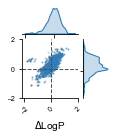

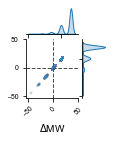

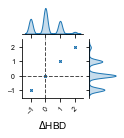

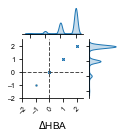

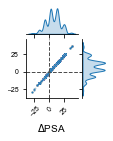

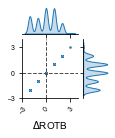

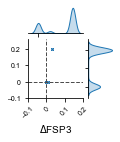

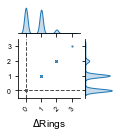

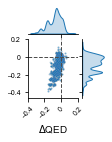

In [50]:
# fig,axs = plt.subplots(9)
# axs_f = axs.flatten()

for ip, prop in enumerate(['LogP', 'MW', 'HBD', 'HBA', 'PSA', 'ROTB', 'FSP3', 'SSSR', 'QED']):

# prop = "HBA"

    new_df = pd.DataFrame()

    new_df = pd.concat((data1[prop], data2[prop]),axis=1)
    new_df.columns=(f"{prop}1",f"{prop}2")
    new_df["distance"] = ["foo"]*len(new_df)

#     df_short = new_df.iloc[::500]
    df_short = new_df
    
    
    lims = np.array([
    np.min( [np.min(data1[prop]),np.min(data2[prop])] ), # min of both axes
    np.max( [np.max(data1[prop]),np.max(data2[prop])] )  # max of both axes
    ])
    
    lim_range = lims[1] - lims[0]
    
    lims[0] -= lim_range*axis_scaleup[ip]
    lims[1] += lim_range*axis_scaleup[ip]
    
#     plt.figure(figsize=(2,2))

    g = sns.jointplot(data=df_short,x=f"{prop}1",y=f"{prop}2",hue="distance",legend=False,
                      alpha=0.1,ratio=2,xlim=lims,ylim=lims,height=2)
    
    
    
    gg = 0.3
    
    g.ax_joint.cla()
    
    sns.scatterplot(data=df_short,x=f"{prop}1",y=f"{prop}2", s=3,alpha=0.1,
                ax=g.ax_joint)
    
    if prop == "SSSR":
        g.set_axis_labels(r'$\Delta$'+"Rings", "", fontsize=6,font="Arial")
    else:
        
        g.set_axis_labels(r'$\Delta$'+f"{prop}", "", fontsize=6,font="Arial")\
        
    g.ax_joint.set_xticks(lims_dict[prop])
    g.ax_joint.set_yticks(lims_dict[prop])
    
    g.ax_joint.set_xticklabels(labels_dict[prop],rotation=45,font="Arial",fontsize=7)
    g.ax_joint.set_yticklabels(labels_dict[prop],font="Arial",fontsize=7)
    
    g.ax_joint.axvline(0,color=(gg,gg,gg,1),ls="--",linewidth=1)
    g.ax_joint.axhline(0,color=(gg,gg,gg,1),ls="--",linewidth=1)
#     plt.tight_layout()
    
    
    
#     print(g.ax_marg_x.get_xticks())
    plt.savefig(f"figS4_{prop}.png",dpi=900)
#     g.ax_joint.set_xticks((lims[0],0,lims[1]))
# plt.show()
#     ax1 = sns.jointplot(x=x, y=y)
#     g.ax_joint.cla()
#     plt.sca(g.ax_joint)

#     plt.hist2d(df_short[f"{prop}1"],df_short[f"{prop}2"], bins=(100, 100), cmap="plasma",cmin=1);
